In [1]:
pip install ace_tools


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


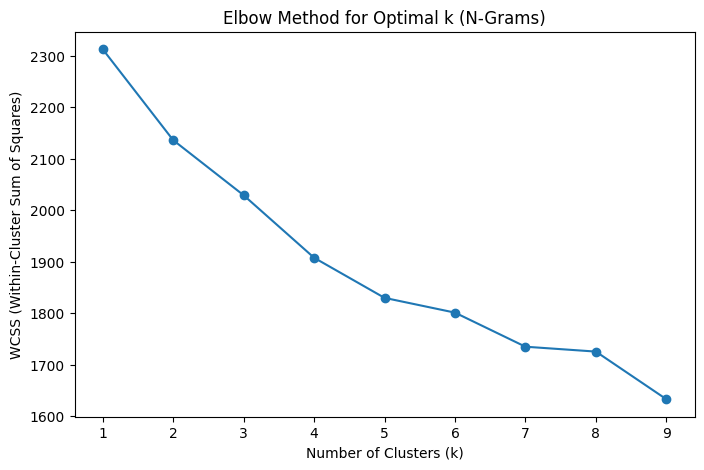

Silhouette Score for N-Grams Clustering: 0.108


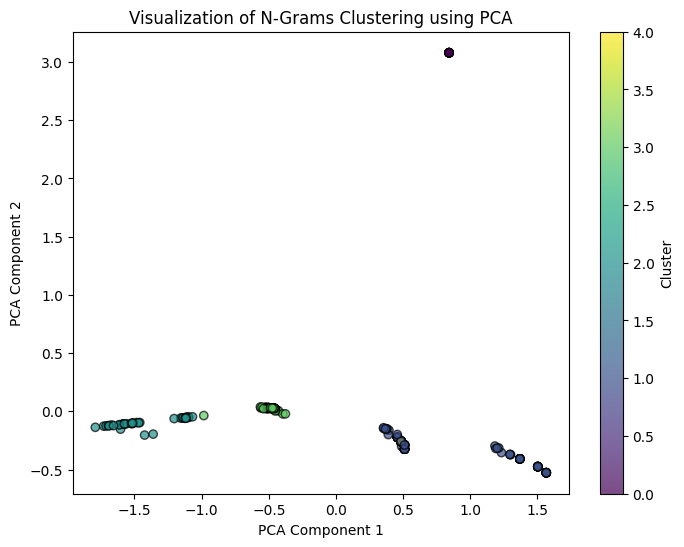

                                                name  Cluster_NGrams
0  Some computer science issues in ubiquitous com...               0
1                      Computer science: An overview               1
2                    Foundations of computer science               1
3                       Is computer science science?               4
4   Computer science and its relation to mathematics               1


In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load dataset
file_path = "new_dataset.csv" 
df = pd.read_csv(file_path)

# Define text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    #text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Applying preprocessing to the 'name' and 'keywords' columns
df['processed_text'] = df['name'].astype(str) + " " + df['keywords'].astype(str)
df['processed_text'] = df['processed_text'].apply(preprocess_text)

# Applying N-Grams using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Using Bigrams
#vectorizer = CountVectorizer(ngram_range=(3, 3))  #Using Trigrams
X_ngrams = vectorizer.fit_transform(df['processed_text'])

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_ngrams)
    wcss.append(kmeans.inertia_)
# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k (N-Grams)')
plt.show()

# Choose the optimal number of clusters (based on the elbow curve)
optimal_k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_NGrams'] = kmeans.fit_predict(X_ngrams)

# Compute silhouette score for evaluation
silhouette_avg = silhouette_score(X_ngrams, df['Cluster_NGrams'])
print(f"Silhouette Score for N-Grams Clustering: {silhouette_avg:.3f}")

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca_ngrams = pca.fit_transform(X_ngrams.toarray())

# Create scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_ngrams[:, 0], X_pca_ngrams[:, 1], c=df['Cluster_NGrams'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualization of N-Grams Clustering using PCA')
plt.colorbar(label='Cluster')
plt.show()

print(df[['name', 'Cluster_NGrams']].head())
